In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = (7, 7)

In [3]:
def validate_input(theta, p_theta: np.array, data: np.array):
    if np.any((theta > 1) | (theta < 0)):
        raise Exception("Theta values must be between 0 and 1")
        
    if np.any((p_theta < 0)):
        raise Exception("pTheta must be non-negative")
        
    if p_theta.sum().round(3) != 1:
        raise Exception("pTheta values must sum to 1.0")
        
    if not np.all((data == 1) | (data == 0)):
        raise Exception("Data values must be 0 or 1")

In [4]:
theta = np.linspace(0, 1, 11)
p_theta = np.minimum(theta, 1-theta)
p_theta = p_theta / p_theta.sum()
data = np.array([0, 0, 0, 1])

In [5]:
validate_input(theta, p_theta, data)

In [6]:
z = data.sum()
n = len(data)

In [7]:
p_data_given_theta = (theta ** z) * (1 - theta) ** (n - z)
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = (p_data_given_theta * p_theta) / p_data

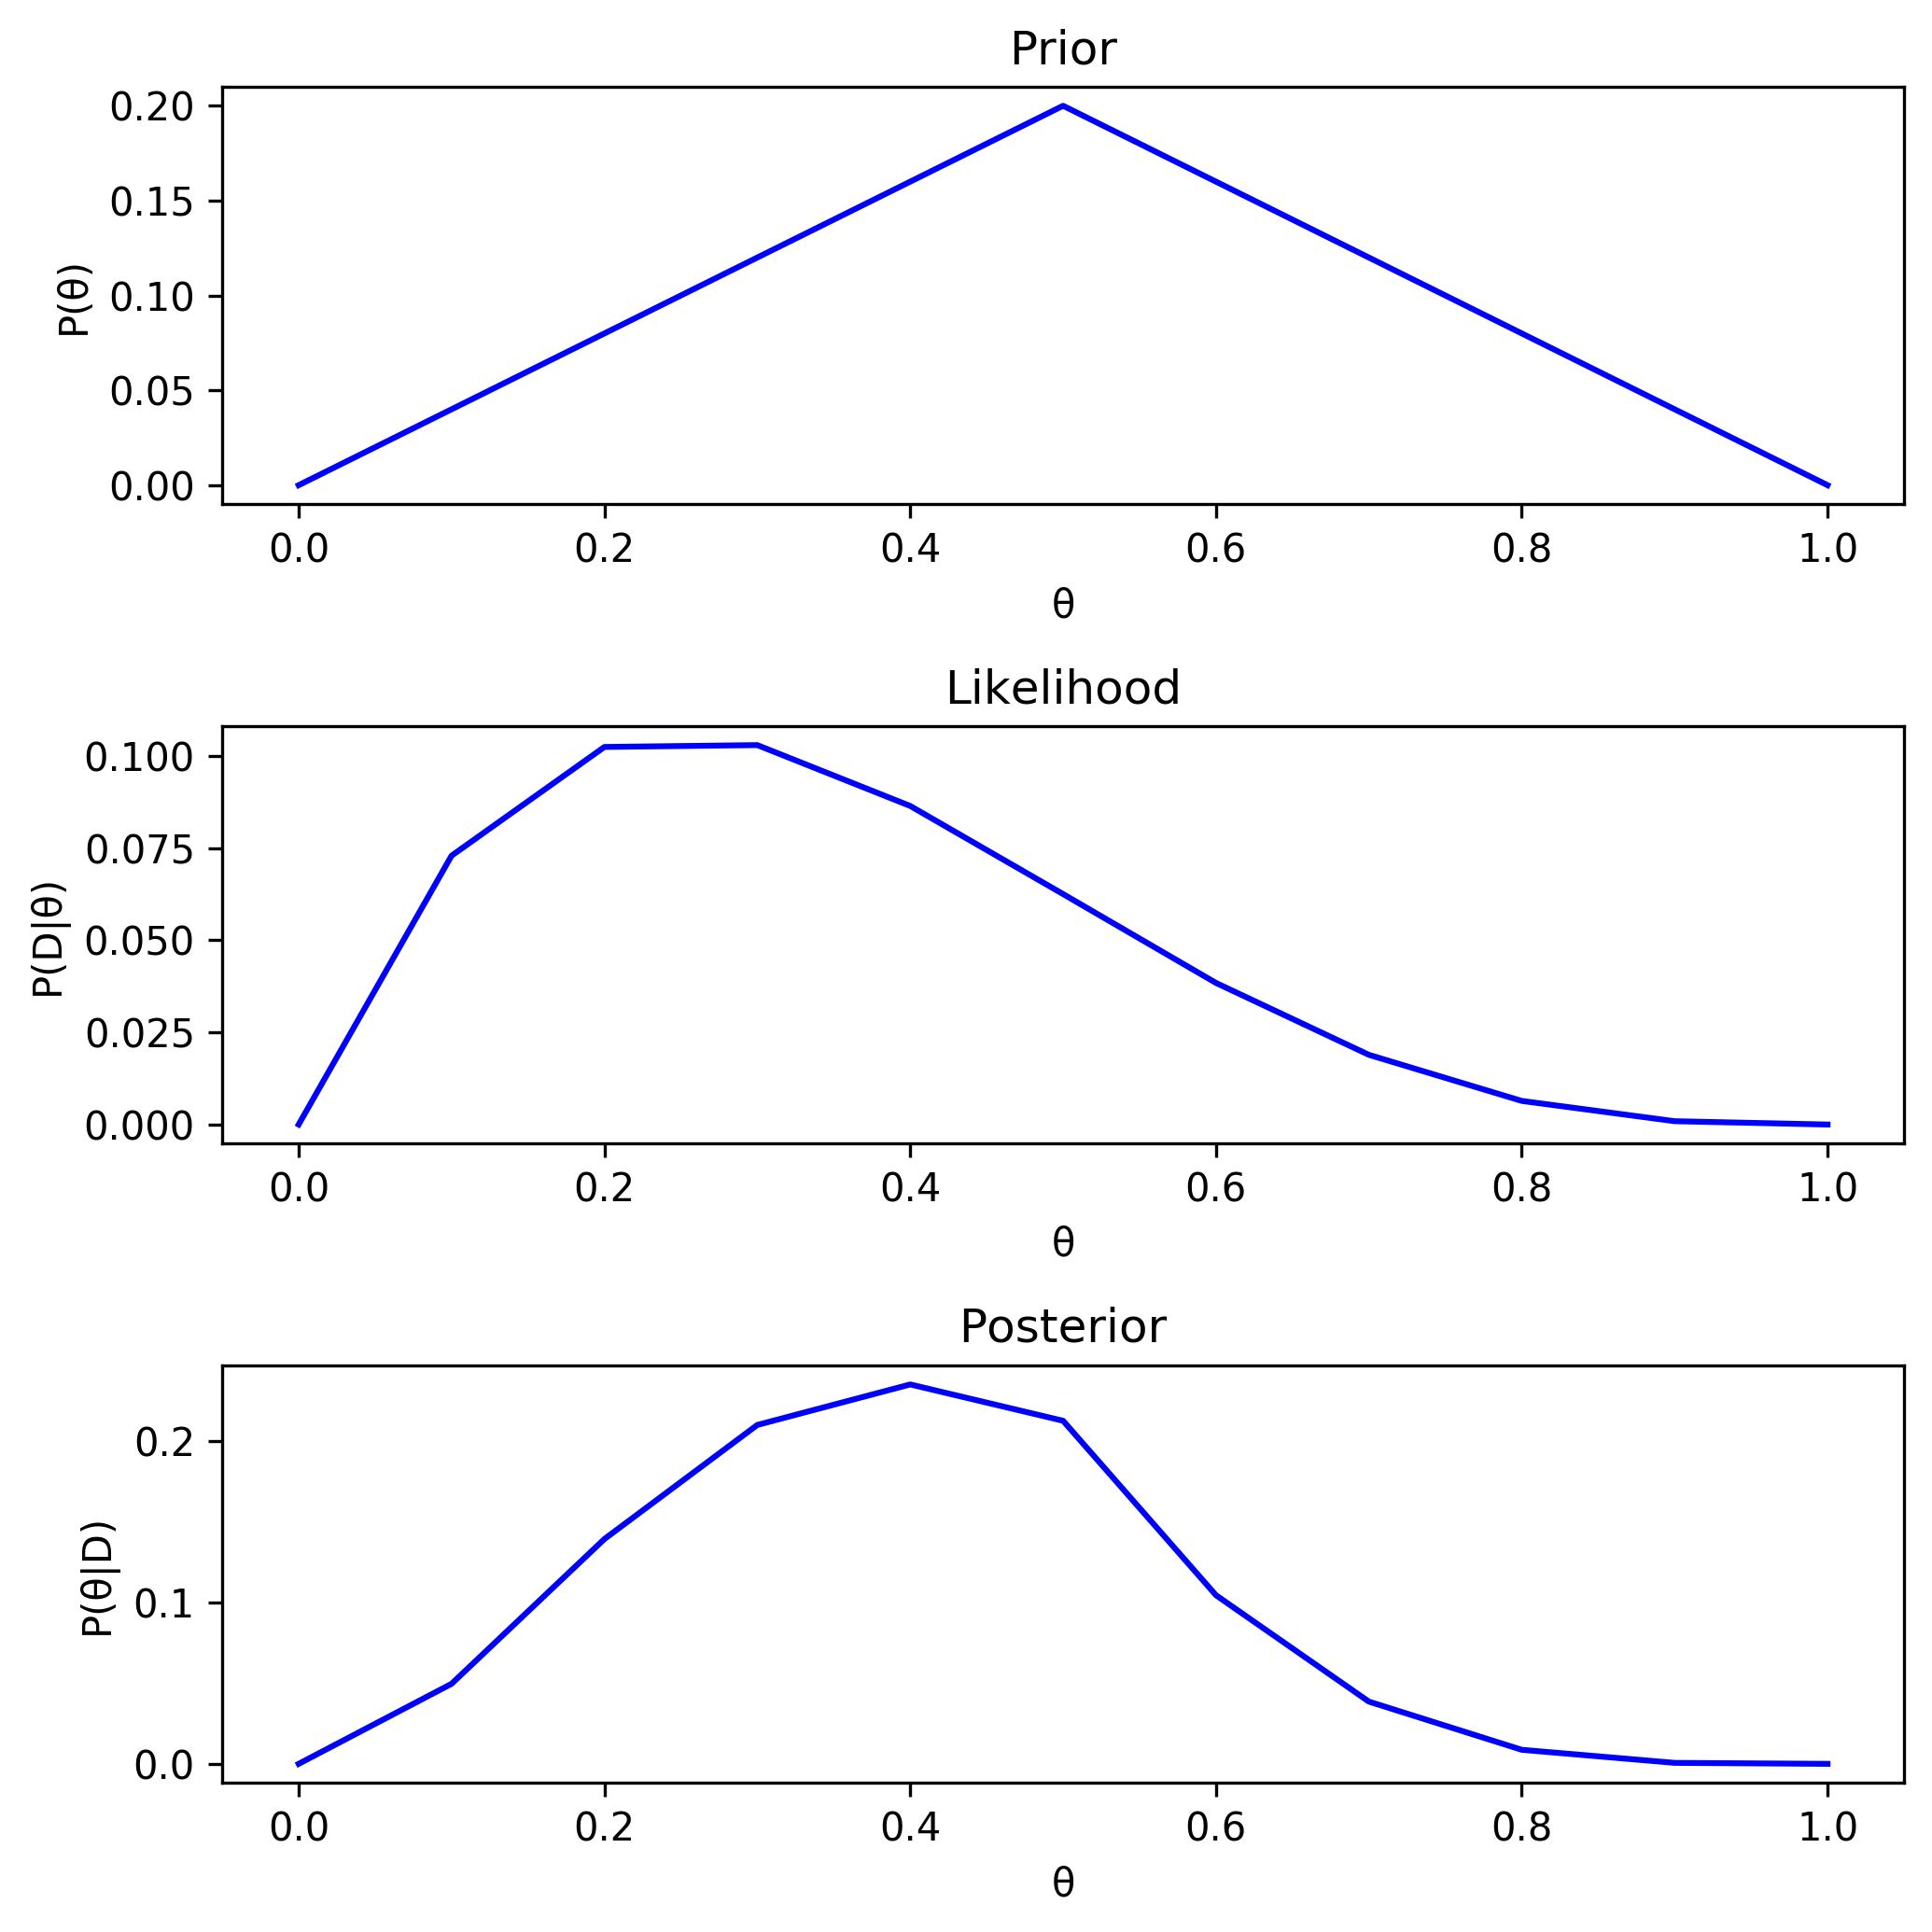

In [46]:
f, (prior_plot, likelihood_plot, posterior_plot) = plt.subplots(3, 1)

sns.lineplot(x=theta.round(1), y=p_theta, color="blue", ax=prior_plot)
sns.lineplot(x=theta.round(1), y=p_data_given_theta, color="blue", ax=likelihood_plot)
sns.lineplot(x=theta.round(1), y=p_theta_given_data, color="blue", ax=posterior_plot)

prior_plot.set_title("Prior")
prior_plot.set_ylabel("P(θ)")
prior_plot.set_xlabel("θ")

likelihood_plot.set_title("Likelihood")
likelihood_plot.set_ylabel("P(D|θ)")
likelihood_plot.set_xlabel("θ")

posterior_plot.set_title("Posterior")
posterior_plot.set_ylabel("P(θ|D)")
posterior_plot.set_xlabel("θ")

plt.tight_layout()
plt.show()